# Practico 02: Interpolación y Extrapolación

En este notebook resolveremos el segundo práctico enfocado en métodos de interpolación y extrapolación de datos.
Partiremos de un conjunto de datos sintéticos, creados a partir de una función objetivo conocida:

$$ y(x) = \frac{1}{\sqrt{2\pi}\sigma} e^{x^2 / 2 \sigma^2}, $$

con $\sigma = 0.5$.
Luego los interpolaremos a través del **método de polinomios** y un **spline cúbico**, implementados a través de las funciones `scipy.interpolate.lagrange` y `scipy.interpolate.interp1d` (con argumento `kind="cubic"`), respectivamente.

Finalmente, utilizaremos los interpoladores generados para predecir valores y compararlos con los valores de la función objetivo.


Importamos paquetes necesarios

In [1]:
import numpy as np
from scipy.interpolate import lagrange, interp1d
import matplotlib.pyplot as plt

Definimos la función objetivo

In [2]:
def target_function(x, sigma=0.5):
    """
    Define the target function we want to interpolate
    """
    return 1 / np.sqrt(2 * np.pi) * 1 / sigma * np.exp(x ** 2 / sigma ** 2 / 2)

Generamos un conjunto aleatorio de valores y evaluamos la función objetivo en estos puntos.

In [13]:
n_observations = 4  # cantidad de puntos a generar
interval = (-1, 1)  # intervalo para puntos aleatorios

# Definimos una semilla para obtener los mismos resultados en cada ejecución
np.random.seed(123)

# Generamos valores aleatorios de x
x_observed = np.random.uniform(low=interval[0], high=interval[1], size=n_observations)

# Evaluamos la función objetivo en dichos valores
y_observed = target_function(x_observed)

Veamos cómo quedaron los valores sintéticos

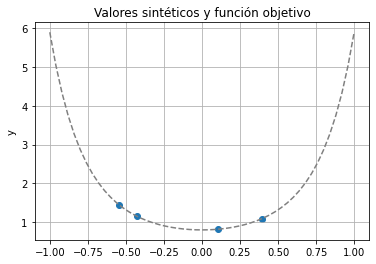

In [14]:
x = np.linspace(*interval, 51)

plt.scatter(x_observed, y_observed)
plt.plot(x, target_function(x), '--', color="grey")
plt.grid()
plt.ylabel("x")
plt.ylabel("y")
plt.title("Valores sintéticos y función objetivo")
plt.show()

Interpolemos los valores sintéticos a través de ambos métodos

In [15]:
# Métodos de polinomios
lagrange_interpolator = lagrange(x_observed, y_observed)

# Cubic Spline
spline_interpolator = interp1d(x_observed, y_observed, kind="cubic", fill_value="extrapolate")

Las funciones utilizadas devolvieron *polinomios interpoladores*, que al ser evaluadas en cualquier punto devuelven el valor predicho por la interpolación.
Veamos cómo cada interpolador predice valores en el mismo intervalo definido anteriormente.

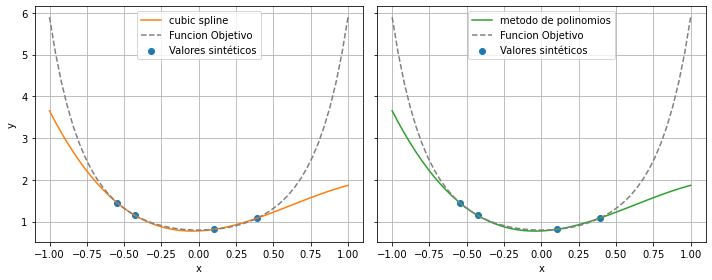

In [16]:
fix, axes = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(10, 4))

axes[0].plot(x, spline_interpolator(x), color="C1", label="cubic spline")
axes[1].plot(x, lagrange_interpolator(x), color="C2", label="metodo de polinomios")

axes[0].set_ylabel("y")
for ax in axes:
    ax.plot(x, target_function(x), '--', color="grey", label="Funcion Objetivo")
    ax.scatter(x_observed, y_observed, label="Valores sintéticos")
    ax.grid()
    ax.set_xlabel("x")
    ax.legend()

plt.tight_layout()    
plt.show()

### Conclusiones

- Los resultados obtenidos por ambos métodos son muy similares.
- En ambos casos la interpolación predice correctamente (dentro de un rango aceptable) los valores de la función objetivo.
- Sin embargo, las extrapolaciones se desvían de la función objetivo.

## Puntos sintéticos no tan óptimos

¿Qué sucede si los puntos sintéticos no se encuentran en una localización tan óptima como la anterior?

In [ ]:
¿Qué sucede si los puntos sintéticos no se encuentran en una localización tan óptima como la anterior

In [18]:
# Definimos otra semilla
np.random.seed(12345)

# Generamos valores aleatorios de x
x_observed = np.random.uniform(low=interval[0], high=interval[1], size=n_observations)

# Evaluamos la función objetivo en dichos valores
y_observed = target_function(x_observed)

Veamos cómo quedaron los valores sintéticos

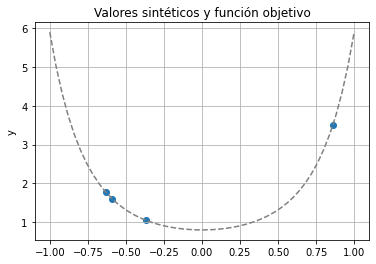

In [19]:
x = np.linspace(*interval, 51)

plt.scatter(x_observed, y_observed)
plt.plot(x, target_function(x), '--', color="grey")
plt.grid()
plt.ylabel("x")
plt.ylabel("y")
plt.title("Valores sintéticos y función objetivo")
plt.show()

Interpolemos los valores sintéticos a través de ambos métodos

In [20]:
# Métodos de polinomios
lagrange_interpolator = lagrange(x_observed, y_observed)

# Cubic Spline
spline_interpolator = interp1d(x_observed, y_observed, kind="cubic", fill_value="extrapolate")

Las funciones utilizadas devolvieron *polinomios interpoladores*, que al ser evaluadas en cualquier punto devuelven el valor predicho por la interpolación.
Veamos cómo cada interpolador predice valores en el mismo intervalo definido anteriormente.

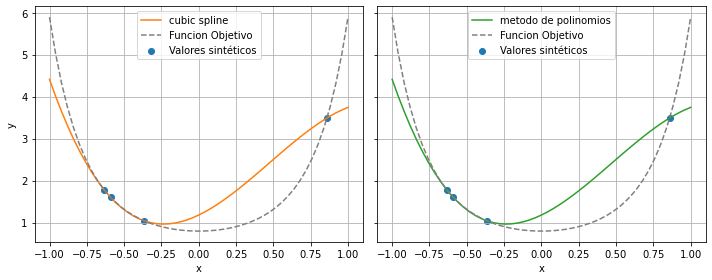

In [21]:
fix, axes = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(10, 4))

axes[0].plot(x, spline_interpolator(x), color="C1", label="cubic spline")
axes[1].plot(x, lagrange_interpolator(x), color="C2", label="metodo de polinomios")

axes[0].set_ylabel("y")
for ax in axes:
    ax.plot(x, target_function(x), '--', color="grey", label="Funcion Objetivo")
    ax.scatter(x_observed, y_observed, label="Valores sintéticos")
    ax.grid()
    ax.set_xlabel("x")
    ax.legend()

plt.tight_layout()    
plt.show()

### Conclusiones

- En este caso la interpolación no es tan buena como la anterior debido a la disposición no óptima de los nuevos puntos observados.
- La extrapolación mejora ligeramenteen la rama izquierda, aunque en la rama derecha la pendiente de la curva dista mucho de la función objetivo, generando valores que pronto serán muy distintos a los objetivo.